# Pendahuluan

Dalam tugas kali ini, Anda diminta untuk melakukan EDA pada [dataset "Housing Price"](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) menggunakan teknik visualisasi 1D dan 2D. Dataset "Housing Price" berisi berbagai informasi mengenai properti-properti yang dijual, misalnya zona lokasi, jumlah kamar tidur, ukuran tanah, dll.

# Data Preparation

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
# Import data -- Silakan di-import berdasarkan direktori masing-masing
house = pd.read_csv('train_house.csv', index_col=0)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
house.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [9]:
house.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
house.shape

(1460, 80)

In [13]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [15]:
house.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [17]:
for column in house.columns:
    print(f"============= {column} =================")
    display(house[column].value_counts())
    print()

============= MSSubClass =================


MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64


============= MSZoning =================


MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


============= LotFrontage =================


LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64


============= LotArea =================


LotArea
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: count, Length: 1073, dtype: int64


============= Street =================


Street
Pave    1454
Grvl       6
Name: count, dtype: int64


============= Alley =================


Alley
Grvl    50
Pave    41
Name: count, dtype: int64


============= LotShape =================


LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64


============= LandContour =================


LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64


============= Utilities =================


Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64


============= LotConfig =================


LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64


============= LandSlope =================


LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64


============= Neighborhood =================


Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64


============= Condition1 =================


Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64


============= Condition2 =================


Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64


============= BldgType =================


BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64


============= HouseStyle =================


HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64


============= OverallQual =================


OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64


============= OverallCond =================


OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64


============= YearBuilt =================


YearBuilt
2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: count, Length: 112, dtype: int64


============= YearRemodAdd =================


YearRemodAdd
1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1986      5
1952      5
1983      5
1951      4
Name: count, Length: 61, dtype: int64


============= RoofStyle =================


RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64


============= RoofMatl =================


RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64


============= Exterior1st =================


Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64


============= Exterior2nd =================


Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64


============= MasVnrType =================


MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64


============= MasVnrArea =================


MasVnrArea
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: count, Length: 327, dtype: int64


============= ExterQual =================


ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64


============= ExterCond =================


ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64


============= Foundation =================


Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64


============= BsmtQual =================


BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64


============= BsmtCond =================


BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64


============= BsmtExposure =================


BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64


============= BsmtFinType1 =================


BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64


============= BsmtFinSF1 =================


BsmtFinSF1
0       467
24       12
16        9
686       5
662       5
       ... 
1338      1
1324      1
1460      1
328       1
830       1
Name: count, Length: 637, dtype: int64


============= BsmtFinType2 =================


BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64


============= BsmtFinSF2 =================


BsmtFinSF2
0       1293
180        5
374        3
551        2
147        2
        ... 
532        1
165        1
1120       1
311        1
1029       1
Name: count, Length: 144, dtype: int64


============= BsmtUnfSF =================


BsmtUnfSF
0       118
728       9
384       8
600       7
300       7
       ... 
551       1
1257      1
605       1
467       1
136       1
Name: count, Length: 780, dtype: int64


============= TotalBsmtSF =================


TotalBsmtSF
0       37
864     35
672     17
912     15
1040    14
        ..
1838     1
1581     1
707      1
611      1
1542     1
Name: count, Length: 721, dtype: int64


============= Heating =================


Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64


============= HeatingQC =================


HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64


============= CentralAir =================


CentralAir
Y    1365
N      95
Name: count, dtype: int64


============= Electrical =================


Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64


============= 1stFlrSF =================


1stFlrSF
864     25
1040    16
912     14
894     12
848     12
        ..
1509     1
2515     1
605      1
3138     1
1256     1
Name: count, Length: 753, dtype: int64


============= 2ndFlrSF =================


2ndFlrSF
0       829
728      10
504       9
546       8
672       8
       ... 
1538      1
914       1
1067      1
1000      1
1152      1
Name: count, Length: 417, dtype: int64


============= LowQualFinSF =================


LowQualFinSF
0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: count, dtype: int64


============= GrLivArea =================


GrLivArea
864     22
1040    14
894     11
1456    10
848     10
        ..
2296     1
1123     1
1199     1
1473     1
1256     1
Name: count, Length: 861, dtype: int64


============= BsmtFullBath =================


BsmtFullBath
0    856
1    588
2     15
3      1
Name: count, dtype: int64


============= BsmtHalfBath =================


BsmtHalfBath
0    1378
1      80
2       2
Name: count, dtype: int64


============= FullBath =================


FullBath
2    768
1    650
3     33
0      9
Name: count, dtype: int64


============= HalfBath =================


HalfBath
0    913
1    535
2     12
Name: count, dtype: int64


============= BedroomAbvGr =================


BedroomAbvGr
3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: count, dtype: int64


============= KitchenAbvGr =================


KitchenAbvGr
1    1392
2      65
3       2
0       1
Name: count, dtype: int64


============= KitchenQual =================


KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64


============= TotRmsAbvGrd =================


TotRmsAbvGrd
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: count, dtype: int64


============= Functional =================


Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64


============= Fireplaces =================


Fireplaces
0    690
1    650
2    115
3      5
Name: count, dtype: int64


============= FireplaceQu =================


FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64


============= GarageType =================


GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64


============= GarageYrBlt =================


GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: count, Length: 97, dtype: int64


============= GarageFinish =================


GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64


============= GarageCars =================


GarageCars
2    824
1    369
3    181
0     81
4      5
Name: count, dtype: int64


============= GarageArea =================


GarageArea
0      81
440    49
576    47
240    38
484    34
       ..
320     1
594     1
831     1
878     1
192     1
Name: count, Length: 441, dtype: int64


============= GarageQual =================


GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64


============= GarageCond =================


GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64


============= PavedDrive =================


PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64


============= WoodDeckSF =================


WoodDeckSF
0      761
192     38
100     36
144     33
120     31
      ... 
326      1
179      1
103      1
176      1
736      1
Name: count, Length: 274, dtype: int64


============= OpenPorchSF =================


OpenPorchSF
0      656
36      29
48      22
20      21
40      19
      ... 
11       1
523      1
125      1
137      1
236      1
Name: count, Length: 202, dtype: int64


============= EnclosedPorch =================


EnclosedPorch
0      1252
112      15
96        6
192       5
144       5
       ... 
54        1
136       1
148       1
140       1
99        1
Name: count, Length: 120, dtype: int64


============= 3SsnPorch =================


3SsnPorch
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: count, dtype: int64


============= ScreenPorch =================


ScreenPorch
0      1344
192       6
120       5
224       5
189       4
       ... 
291       1
260       1
385       1
156       1
40        1
Name: count, Length: 76, dtype: int64


============= PoolArea =================


PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64


============= PoolQC =================


PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64


============= Fence =================


Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64


============= MiscFeature =================


MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64


============= MiscVal =================


MiscVal
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: count, dtype: int64


============= MoSold =================


MoSold
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: count, dtype: int64


============= YrSold =================


YrSold
2009    338
2007    329
2006    314
2008    304
2010    175
Name: count, dtype: int64


============= SaleType =================


SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64


============= SaleCondition =================


SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64


============= SalePrice =================


SalePrice
140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: count, Length: 663, dtype: int64

## Check NaN

In [19]:
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [21]:
house.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [23]:
# Drop variabel NaN
house = house.dropna(axis=1)
house.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [25]:
# Memisahkan data menjadi numerikal & kategorikal

#### Mendapatkan Data Numerik

In [27]:
num_cols = house._get_numeric_data().columns
house_numeric = house[num_cols]
house_numeric.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


#### Mendapatkan data kategorikal/ordinal

In [29]:
house_categorical = house.drop(num_cols, axis = 1)
house_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


# 1D Visualization 

### Utilities

* `Utilities` berisi informasi mengenai fasilitas apa saja yang tersedia di properti tersebut
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSeWa	Electricity and Gas Only	

## Soal 1

1. Buatlah visualisasi barplot dan analisis untuk variabel kategorikal:
    * `Utilities`
    * `HouseStyle`
    * `ExterQual` 

2. Buatlah visualisasi histogram dan analisis untuk variabel numerikal:
    * `SalePrice`
    * `GrLivArea`
    * `PoolArea`

3. Terapkan pemrosesan data yang sesuai untuk masing-masing variabel dan tulis penjelasan serta analisisnya!

## Visualisasi Variabel Kategorikal
* Untuk keperluan analisis variabel kategori kita akan gunakan 3 contoh variabel yaitu `Utilities`, `HouseStyle`, dan `ExterQual`

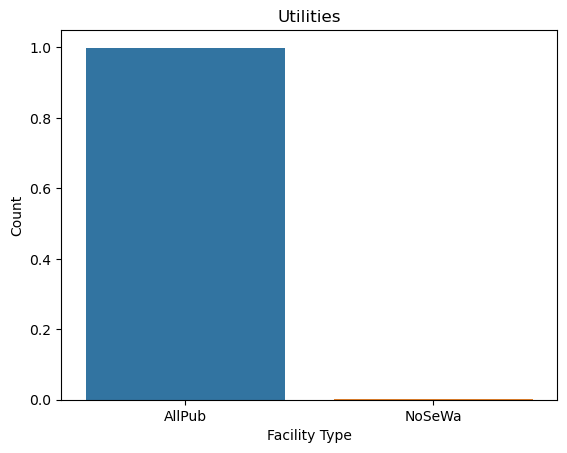

In [31]:
### Code Utilities Visualisasi Barplot
sns.barplot(x=house_categorical['Utilities'].value_counts().index,
                 y=house_categorical['Utilities'].value_counts(normalize = True))
plt.title("Utilities")
plt.ylabel('Count')
plt.xlabel('Facility Type')
plt.show()

* Kita dapat melihat bahwa hampir 100% dari data adalah AllPub, yaitu All public Utilities.
* Lalu, sekitar 1% dari data adalah NoSeWa (Electricity and Gas Only).
* Ketika diberikan data seperti ini, kita dapat membuat pertanyaan, misal:
    * Hampir 100% properti yang dijual Lebih suka menggunakan fasilitas All public Utilities. Mengapa? Sehingga kebanyakan properti menyediakan fasilitas All public Utilities
    * Bagaimana hubungan Fasilitas All public Utilities yang tersedia dengan harga jual?
    * dll
    * Coba kita lihat jumlahnya:

In [33]:
house_categorical['Utilities'].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

### HouseStyle

HouseStyle: Style properti (misal: 1 lantai, 2 lantai, dst)
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

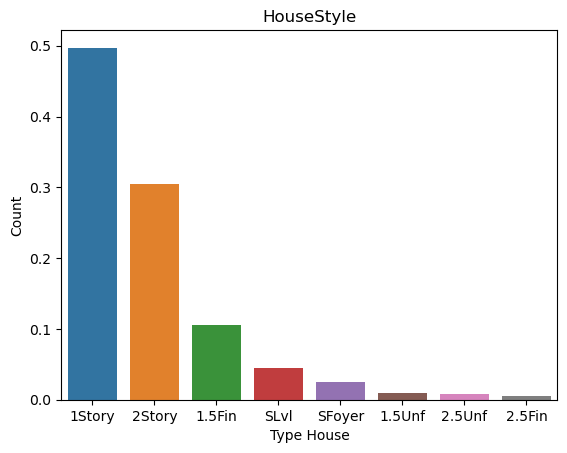

In [35]:
### Tulis kode Anda di sini
sns.barplot(x=house_categorical['HouseStyle'].value_counts().index,
                 y=house_categorical['HouseStyle'].value_counts(normalize = True))
plt.title("HouseStyle")
plt.ylabel('Count')
plt.xlabel('Type House')
plt.show()

* Dari data kategorikal tersebut, kita dapat mengetahui bahwa data tersebut imbalanced.
* Kita dapat melihat bahwa hampir 50% dari data adalah kategori 1Story, yaitu One story (1 Lantai).
* Lalu, yang kedua sekitar 30% dari data adalah kategori 2Story (2 Lantai).
* Sedangkan yang lainnya jika ditotal mungkin akan sekitar 20%.
* Ketika diberikan data seperti ini, kita dapat membuat pertanyaan, misal:
    * Hampir 50% Style properti yang dijual adalah One Story (1 Lantai). Mengapa? 
    Sehingga kebanyakan Style properti berbentuk 1Story dan 2Story
    * Apakah Style properti mempengaruhi harga jual properti?
    * Coba kita lihat jumlahnya:

In [37]:
house_categorical['HouseStyle'].value_counts()

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

### ExterQual

ExterQual: Kualitas material eksterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair

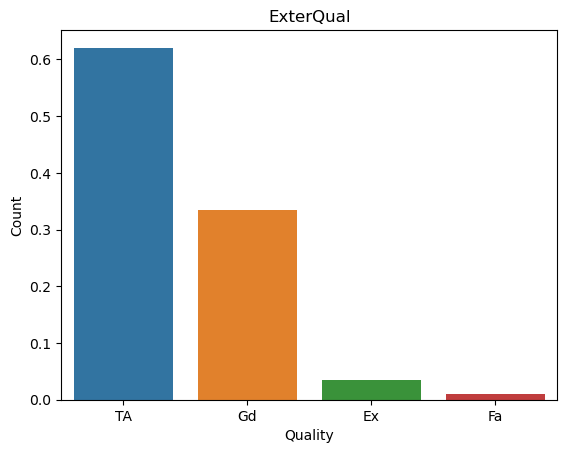

In [39]:
### Tulis kode Anda di sini
sns.barplot(x=house_categorical['ExterQual'].value_counts().index,
                 y=house_categorical['ExterQual'].value_counts(normalize = True))
plt.title("ExterQual")
plt.ylabel('Count')
plt.xlabel('Quality')
plt.show()

In [41]:
house_categorical['ExterQual'].value_counts()

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

#### **Analisis tentang variabel kategorikal**
* Sama seperti variabel HouseStyle, kita dapat melihat bahwa datanya imbalanced.
* Lebih dari 60% Properti pada Kualitas material eksterior yang dijual adalah Kualitas Average/Typical.
* Dan Lebih dari 30% properti yang dijual dengan Kualitas Good
* Sangat sedikit properti yang Kualitas material eksteriornya Excellent dan Fair.
* Dari hal ini kita bisa membuat pertanyaan:
    * Mengapa banyak properti yang Kualitas material eksteriornya Average/Typical?
    * Apakah orang US lebih suka bentuk properti yang Kualitasnya Average/Typical? Sehingga kebanyakan properti Kualitas material eksteriornya Average/Typical.
    * Apakah variabel ini mempengaruhi harga jual properti?


---
* Dari barplot tersebut kita belum bisa mendapat kesimpulan apapun.
* Namun, dengan menggunakan barplot kita dapat mengetahui bagaimana data terdistribusi.
* Dan yang paling penting, kita dapat membuat pertanyaan-pertanyaaan yang dapat membantu kita untuk analisis lebih lanjut.

## Variabel Numerikal

### SalePrice

* SalePrice merupakan variabel target yang ingin diprediksi
* Secara fisik, ini berarti harga properti yang dijual

C:\Users\Asus\AppData\Local\Temp\ipykernel_5384\2512611289.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median: 163000.0
Mean: 180921.19589041095
Std Dev: 79442.50288288663


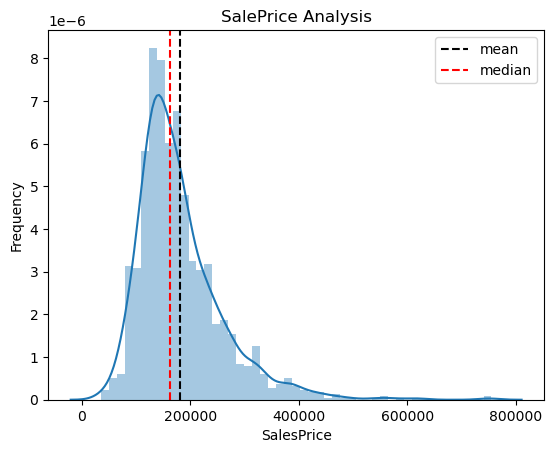

In [43]:
### Tulis kode Anda di sini
# Median
# Mean
# Std Dev
x = house_numeric["SalePrice"]
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.title("SalePrice Analysis")
plt.ylabel('Frequency')
plt.xlabel('SalesPrice')
plt.show()

#### **Analisis tentang variabel `SalePrice`**

**Analisis dan pertanyaan**
* Distribusi *right-skewed*.
* Kebanyakan data berada dalam range sekitar 100,000 sampai 300,000. Apakah ini wajar untuk harga rumah di US?
* Nilai selalu positif. Namun, kalau dimasukkan ke model ML hasil prediksi bisa jadi negatif kalau salah.

### GrLivArea

* GrLivArea berisi informasi mengenai luas area tinggal di atas permukaan tanah (tidak termasuk basement)
* Satuan yang digunakan adalah *square feet*

C:\Users\Asus\AppData\Local\Temp\ipykernel_5384\32336181.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name, bins = 100)


Median: 1464.0
Mean: 1515.463698630137
Std Dev: 525.4803834232027


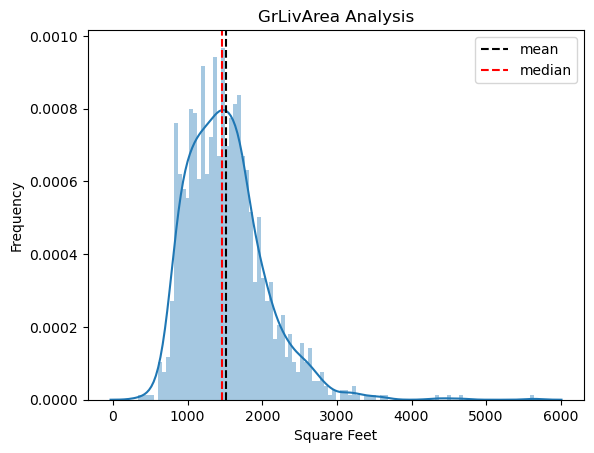

In [93]:
### Tulis kode Anda di sini
# Median
# Mean
# Std Dev
x = house_numeric['GrLivArea'][house_numeric['GrLivArea'] > 0]
sns.distplot(x, axlabel=x.name, bins = 100)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.title("GrLivArea Analysis")
plt.ylabel('Frequency')
plt.xlabel('Square Feet')
plt.show()

#### **Analisis tentang variabel `GrlivArea`**

* Ketika kita mengambil GrLivArea luas area tinggal, maka Distribusi variabel tersebut Terlihat *right-skewed*.
* Luas area tinggal di atas permukaan tanah (tidak termasuk basement) Rata - rata berada pada kisaran 1500

# GarageArea

* GarageArea berisi informasi mengenai luas garasi (jika ada)
* Satuan yang digunakan adalah *square feet*

C:\Users\Asus\AppData\Local\Temp\ipykernel_5384\2289699046.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name, bins = 30)


Median: 484.0
Mean: 500.76214648295866
Std Dev: 185.68051979433156


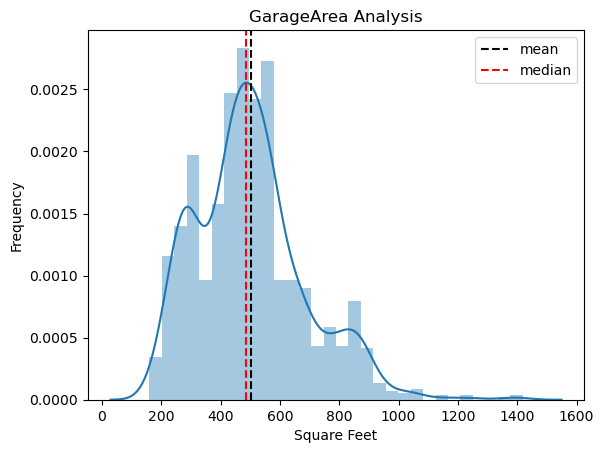

In [100]:
# Menghilangkan nilai nol pada GarageArea

x = house_numeric["GarageArea"][house_numeric["GarageArea"] > 0]
sns.distplot(x, axlabel=x.name, bins = 30)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.title("GarageArea Analysis")
plt.ylabel('Frequency')
plt.xlabel('Square Feet')
plt.show()

#### **Penjelasan dan analisis tentang pemrosesan data**

* transformasi dengan log-scale.
    * Membuat distribusi terlihat seperti distribusi normal.
    * Memaksa nilai harga selalu positif, bahkan ketika dimasukkan kedalam model.
* Ketika kita mengambil kluster yang memiliki Garasi, maka distribusi variabel terlihat lebih baik.
* Dengan menggunakan transformasi skala maupun menghapus anomali Nilai 0 distribusi menjadi lebih mendekati distribusi normal.
* Untuk analisis variabel-variabel lainnya, dapat dicoba sendiri.
* Namun perlu diingat, tujuan dari EDA adalah untuk eksplorasi.
* Sehingga output dari EDA adalah berupa pertanyaan dan hipotesis yang siap untuk diuji pada proses lebih lanjut.

In [104]:
print('number of nonzero values:',np.sum(house_numeric['GarageArea'] > 0))
print('number of zero values:',np.sum(house_numeric['GarageArea'] == 0))

number of nonzero values: 1379
number of zero values: 81


**Analisis**
* Ternyata data ini memiliki nilai 0 yang cukup banyak.
* Jika dilihat dari deskripsi, `GarageArea:  luas garasi (jika ada) square feet`.
* Dari pernyataan tersebut kita dapat membuat suatu pernyataan.
* "Tidak semua rumah memiliki Garasi".
* Dari pernyataan tersebut kita dapat melakukan analisis lebih jauh lagi:
    * Untuk analisis lebih jauh, kita dapat membuat kluster dari data tersebut.
    * Yaitu kluster rumah dengan Garasi dan rumah tanpa Garasi

## Pemrosesan Data Variabel Numerikal

C:\Users\Asus\AppData\Local\Temp\ipykernel_5384\3754018782.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name)


Median: 5.212187604403958
Mean: 5.221978956475628
Std Dev: 0.17347974217176843


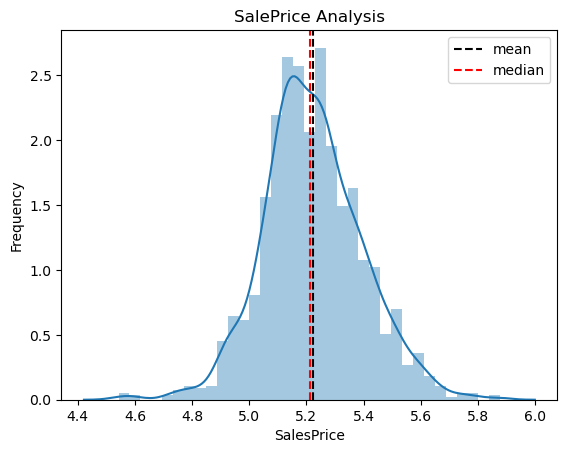

In [106]:
# Transformasi log-10 SalePrice

### Tulis kode Anda di sini
# Median
# Mean
# Std Dev
x = np.log10(house_numeric["SalePrice"])
sns.distplot(x, axlabel=x.name)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.title("SalePrice Analysis")
plt.ylabel('Frequency')
plt.xlabel('SalesPrice')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_5384\2162064047.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, axlabel=x.name, bins = 30)


Median: 3.165541076722373
Mean: 3.156354310389778
Std Dev: 0.14485910869663873


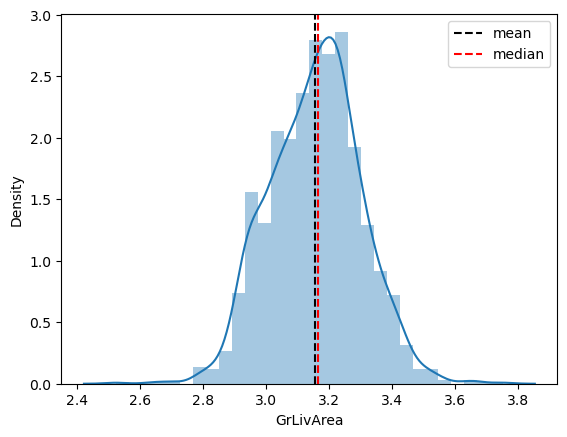

In [108]:
# Transformasi log-10 GrLivArea

### Tulis kode Anda di sini
# Median
# Mean
# Std Dev
x = np.log10(house_numeric["GrLivArea"])
sns.distplot(x, axlabel=x.name, bins = 30)
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
first_legend = plt.legend(handles=[line1,line2], loc=1)
print("Median:", x.median())
print("Mean:", x.mean())
print("Std Dev:", x.std())
plt.show()

### Berikut adalah plot histogram dari semua variabel:

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\Asus\anaconda3\Lib\site

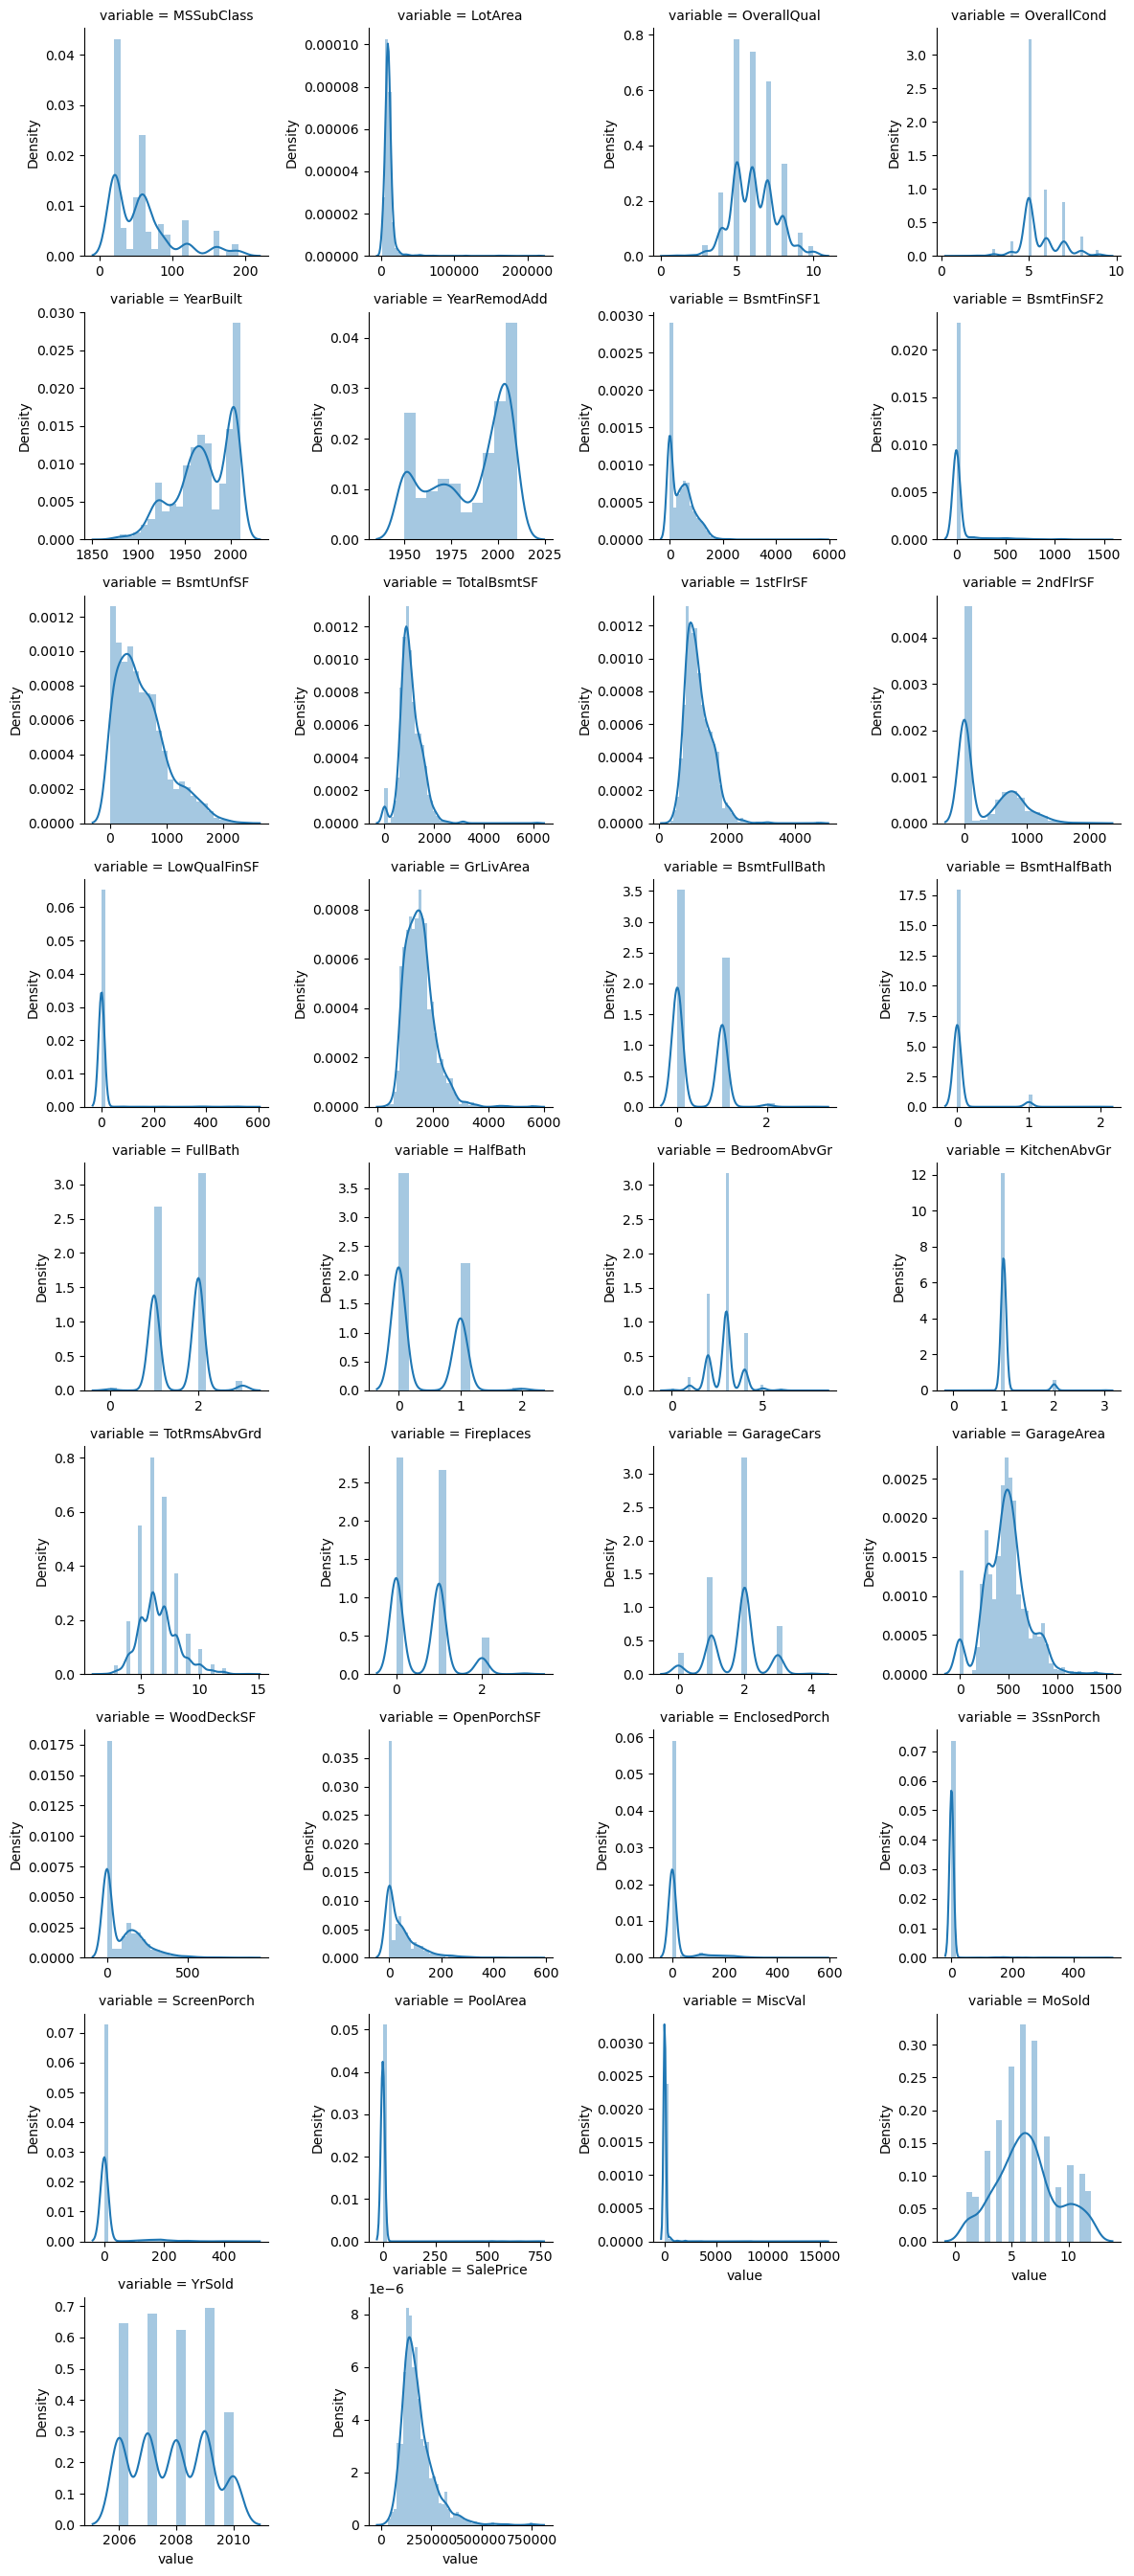

In [89]:
f = pd.melt(house_numeric, value_vars=house_numeric.columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

# 2D Visualization

## Soal 2

1. Buat visualisasi tentang hubungan antara:
    * `GrLivArea` dengan `SalePrice`
    * `GarageArea` dengan `SalePrice`

2. Buat hipotesis Anda tentang hubungan antar-variabel

# `GrLivArea` dengan `SalePrice`

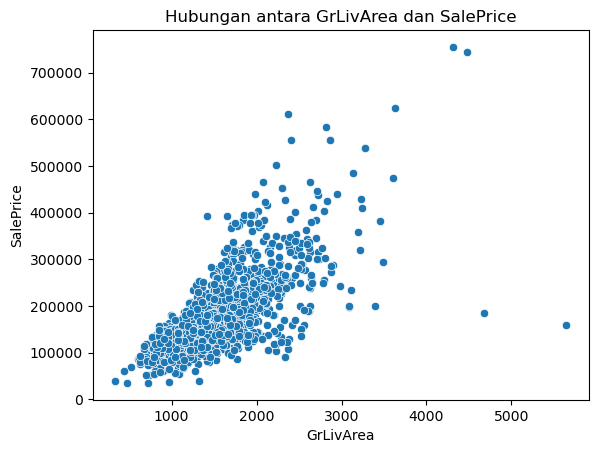

In [114]:
ax = sns.scatterplot(y="SalePrice", x="GrLivArea", data=house_numeric)
plt.title('Hubungan antara GrLivArea dan SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [204]:
Korelasi_GrLivArea = house_numeric['SalePrice'].corr(house_numeric['GrLivArea'])
corr_Korelasi_GrLivArea = 'Korelasi SalePrice dengan GrLivArea' + ' ' + ': ' +str(Korelasi_GrLivArea)+ " .jadi Kesimpulannya Korelasi SalePrice dengan GrLivArea Adalah Korelasinya Kuat"
corr_Korelasi_GrLivArea

'Korelasi SalePrice dengan GrLivArea : 0.7086244776126522 .jadi Kesimpulannya Korelasi SalePrice dengan GrLivArea Adalah Korelasinya Kuat'

# `GarageArea` dengan `SalePrice`

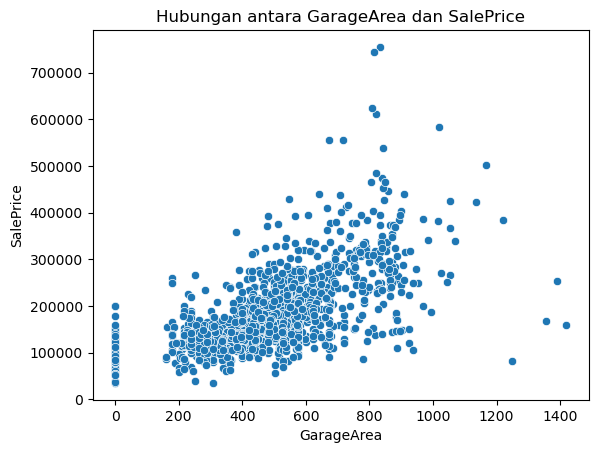

In [130]:
ax = sns.scatterplot(y="SalePrice", x="GarageArea", data=house_numeric)
plt.title('Hubungan antara GarageArea dan SalePrice')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

In [208]:
Korelasi_GarageArea = house_numeric['SalePrice'].corr(house_numeric['GarageArea'])
corr_Korelasi_GarageArea = 'Korelasi SalePrice dengan GarageArea' + ' ' + ': ' +str(Korelasi_GarageArea) + " .jadi Kesimpulannya Korelasi SalePrice dengan GarageArea Adalah Korelasinya Kuat"
corr_Korelasi_GarageArea

'Korelasi SalePrice dengan GarageArea : 0.6234314389183617 .jadi Kesimpulannya Korelasi SalePrice dengan GarageArea Adalah Korelasinya Kuat'

#### **Hipotesis tentang hubungan antar-variabel**

* Kita dapat melihat bahwa variabel `GrLivArea` memiliki korelasi positif dengan variabel `SalePrice`
* Kita dapat melihat bahwa variabel `GarageArea` memiliki korelasi positif dengan variabel `SalePrice`
* Namun, Dari situ kita juga dapat melihat bahwa data memiliki kemungkinan anomali.
* Yaitu titik yang berada pada ujung kanan dan Kiri.
* Dari scatterplot, kita juga bisa melihat trendline dari data yang dianalisis:

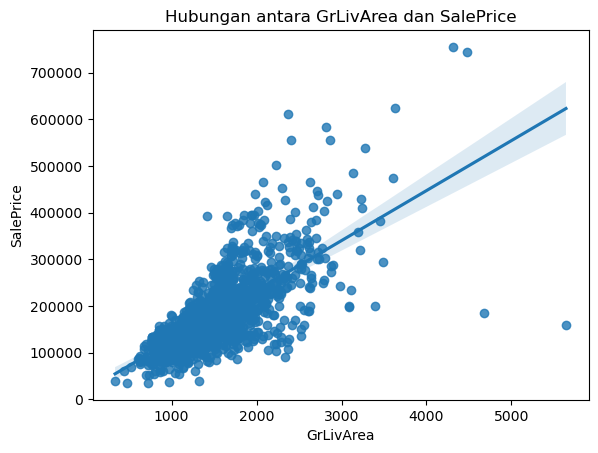

In [118]:
ax = sns.regplot(y="SalePrice", x="GrLivArea", data=house_numeric)
plt.title('Hubungan antara GrLivArea dan SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

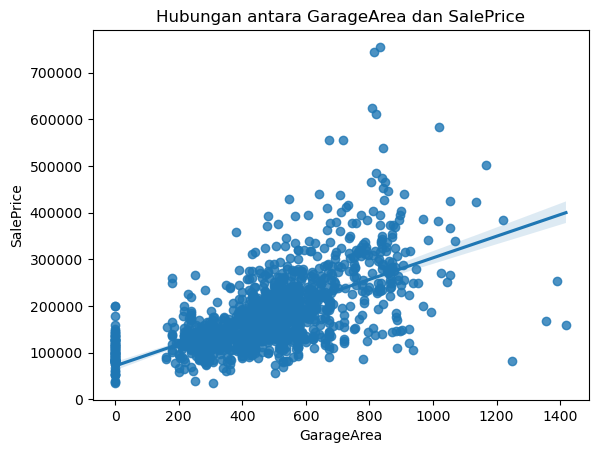

In [120]:
ax = sns.regplot(y="SalePrice", x="GarageArea", data=house_numeric)
plt.title('Hubungan antara GarageArea dan SalePrice')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

## Pairplot
* Mengingat bahwa kita memiliki lebih dari 20 variabel numerik, tentu akan cukup tidak praktis untuk membuat plot satu per satu terhadap `SalePrice`.
* Untuk mempermudah pekerjaan tersebut, kita dapat menggunakan fitur `pairplot`

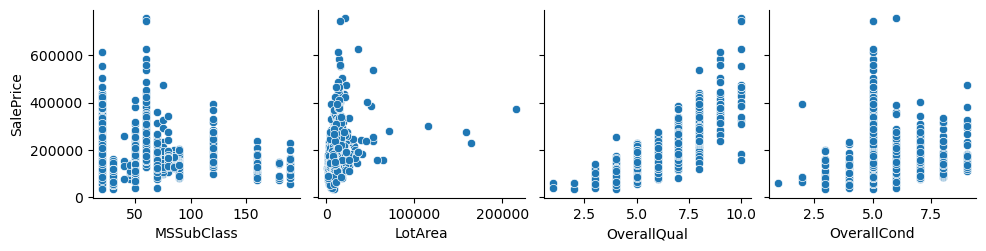

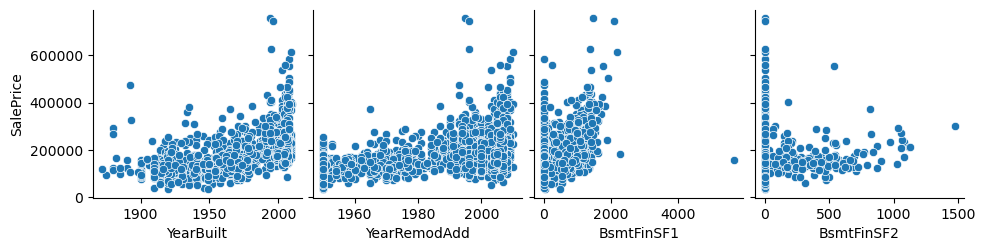

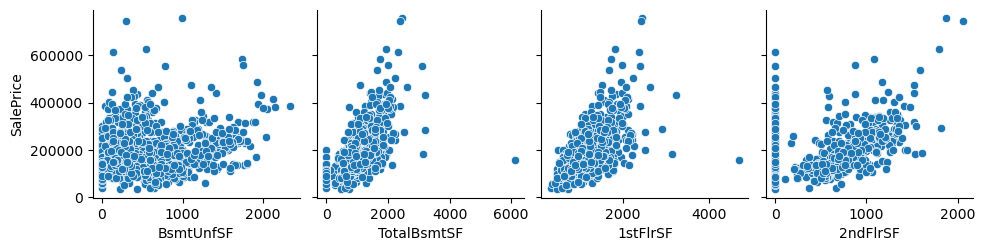

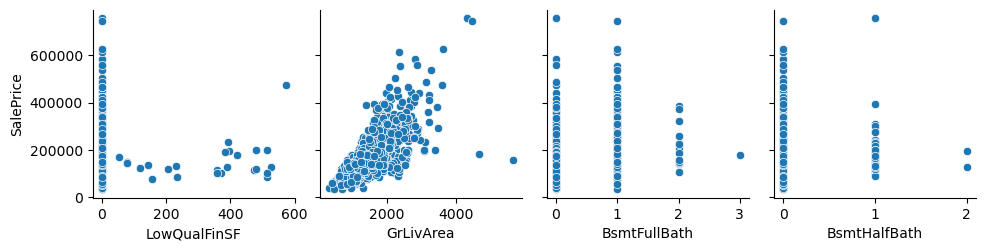

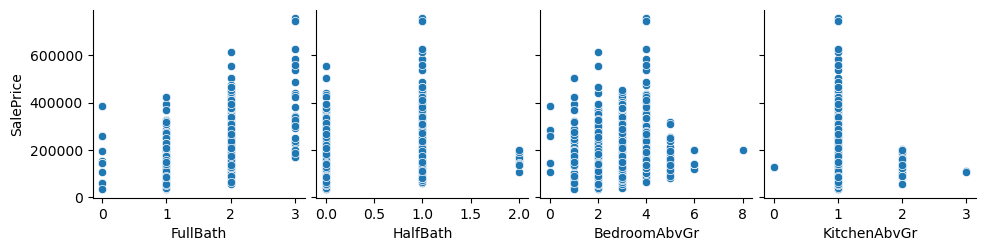

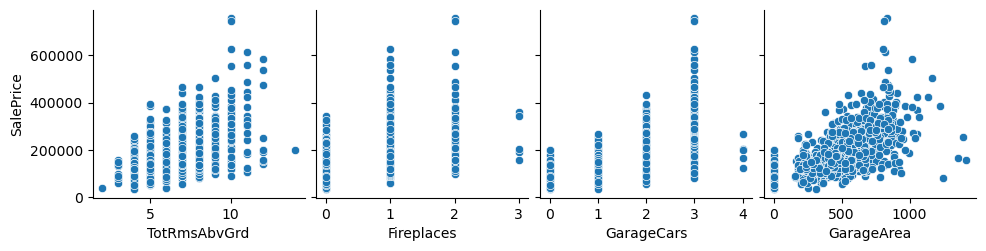

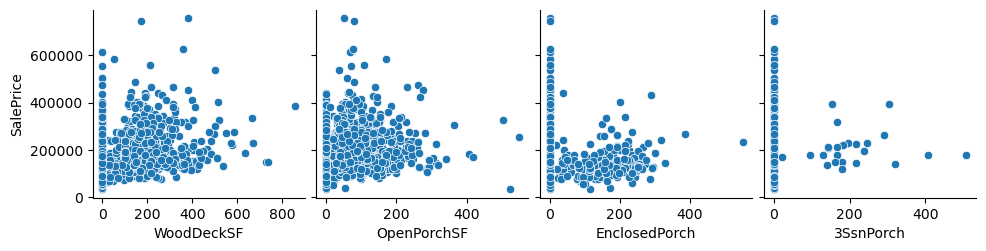

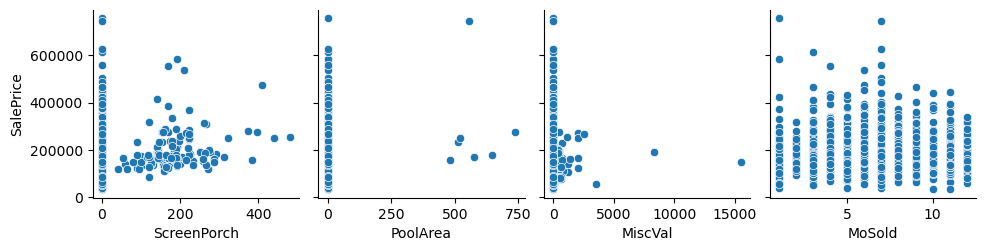

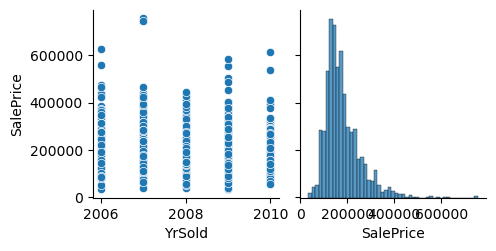

In [122]:
subplots_col = 4
for i in range(0, len(house_numeric.columns), subplots_col):
    sns.pairplot(data=house_numeric,
                x_vars=house_numeric.columns[i:i+subplots_col],
                y_vars=['SalePrice'])